# Info and sources #

## Contributors
- Trent Hare

## Objectives
Below are examples of the most commonly used map projections for planetary research.

## Background
Map projections are mathematical equations for mapping a three-dimensional body onto a two-dimensional plane or Cartesian coordinate system. There is no one best map projection for mapping. The majority of printed maps of the planets and satellites have been based on conformal projections: Mercator for low latitudes, Polar Stereographic for high latitudes, Lambert Conformal Conic for intermediate latitudes at small scales, and Transverse Mercator and Sinusoidal for large-scale maps. Global maps are generally shown in Simple Cylindrical although there is a trend toward projetions like Robinson and Mollweide.

## Requirements
- python 3
- gdal
- mathplotlib, basemap
- scipy
- numpy

Required installations steps beyond the Anaconda Python environment:
  * conda install -c conda-forge gdal
  * conda install -c conda-forge basemap

## Data sources
- MOLA DEM by NASA/Goddard Space Flight Center.
- Colorshaded relief and GIS Mars Chart grids are derived by the USGS

----------------------------------------
# Global Map projections
## Simple Cylindrical (also called Equidistant Cylindrical) ##

For global data sets, the simple cylindrical projection is the most widely used map projection for archival and distribution. Below is a topographic-derived shaded relief representation of Mars colorized by elevation using the simple cylindrical projection. So what do the colors mean? Right after the initial global plot, the color legend will also be shown.

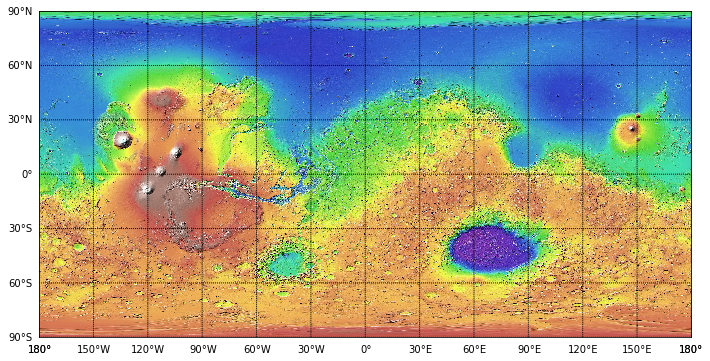

In [1]:
# Simple Cylindrical map projection for Mars
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# define the Semi-major radius for Mars
Mars2000 = 3396190.0

# Well Known Text (WKT) projection string for Simple Cylindrical
# -- this string is actaully not used here, but other GIS applications
# may find this definition useful.
MarsEqui = 'PROJCS["Mars2000_Equi_clon0",GEOGCS["GCS_Mars_2000_Sphere", \
          DATUM["D_Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU",3396190.0,0.0]], \
          PRIMEM["Reference_Meridian",0.0],UNIT["Degree",0.0174532925199433]], \
          PROJECTION["Equidistant_Cylindrical"],PARAMETER["False_Easting",0.0], \
          PARAMETER["False_Northing",0.0], PARAMETER["Central_Meridian",0.0], \
          PARAMETER["Standard_Parallel_1",0.0],UNIT["Meter",1.0], AUTHORITY["IAU2009","49910"]]'

# As in the definition above, define the same projection for Basemap
map = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,
             resolution='l', projection='cyl', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

# Use numpy to define 30 degree meridians and parallels and add to the defined map
meridians = np.arange(-180,181,30)
parallels = np.arange(-90,91,30)

map.drawmeridians(meridians, color='k',labels=[True,False,False,True])
map.drawparallels(parallels,color='k',labels=[True,False,False,True])

# Define the image
molaClrShade = 'cartography_input/Mars_MGS_MOLA_ClrShade_merge_global_64ppd.jpg'
# Use origin='lower' to flip the image
map.imshow(plt.imread(molaClrShade), origin='upper')

plt.show()

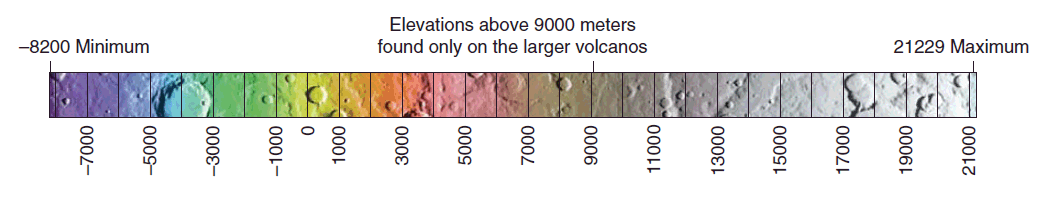

In [54]:
from IPython.display import Image
Image(filename=molaLegend, width=720)

## Robinson map projection ##
The Robinson map projection has been gaining popularity to help show a more realistic global representaion of Mars. While the polar areas are still greatly distorted, the projection makes for a good comprise for a global view using a flat image. One such example is the 2014 published 1:20M scale Geologic map of Mars: https://dx.doi.org/10.3133/sim3292.

Reference: Tanaka, K.L., Skinner, J.A., Jr., Dohm, J.M., Irwin, R.P., III, Kolb, E.J., Fortezzo, C.M., Platz, T., Michael, G.G., and Hare, T.M., 2014, Geologic map of Mars: U.S. Geological Survey Scientific Investigations Map 3292, scale 1:20,000,000, pamphlet 43 pages.

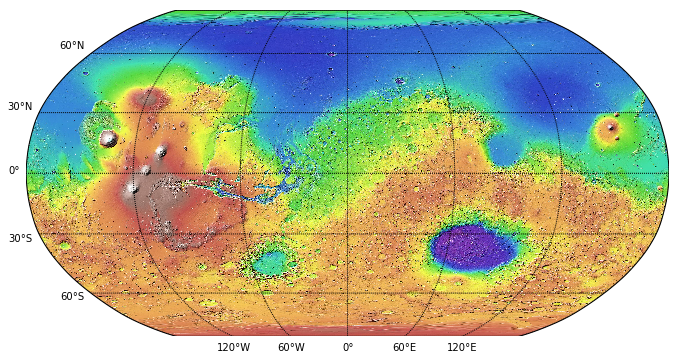

In [57]:
# Show Robinson projection for Mars
plt.figure(figsize=(12,6))

# Well Known Text (WKT) projection string:
MarsRobinson = 'PROJCS[\"Mars2000_Robinson_clon0\",GEOGCS[\"GCS_Mars_2000_Sphere\", \
          DATUM["D_Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU",3396190.0,0.0]], \
          PRIMEM["Reference_Meridian",0.0],UNIT["Degree",0.0174532925199433]], \
          PROJECTION["Robinson"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0], \
          PARAMETER["Central_Meridian",0.0],UNIT["Meter",1.0], AUTHORITY["IAU2009","49926"]]'

map = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,
             resolution='l', projection='robin', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

# Change meridians to only show every 60 degrees
meridians = np.arange(-180,181,60)
parallels = np.arange(-90,91,30)

map.drawmeridians(meridians, color='k',labels=[True,False,False,True])
map.drawparallels(parallels,color='k',labels=[True,False,False,True])

map.imshow(plt.imread(molaClrShade), origin='upper')

plt.show()

## Mollweide map projection ##
The Mollweide map projection is an equal-area map projection. Polar areas are more accurately displayed, however, like the Simple Cylindrical and the Robinson map projections, the shape of features are still distorted. For example, circular impact craters are flatten as you get further away from the equator.

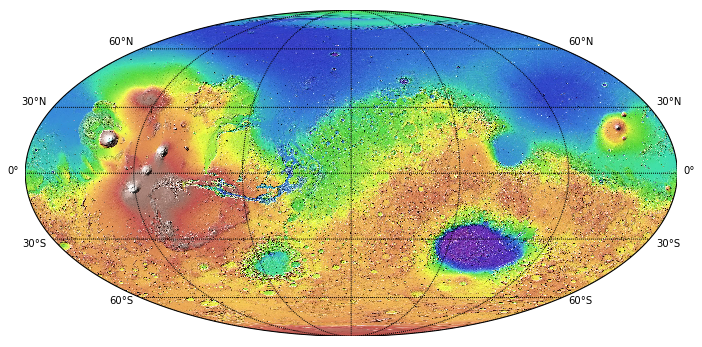

In [58]:
# Show Mollweide projection for Mars
plt.figure(figsize=(12,6))

# Well Known Text (WKT) projection string:
MarsMollweide = 'PROJCS[\"Mars2000_Mollweide_clon0\",GEOGCS[\"GCS_Mars_2000_Sphere\", \
          DATUM["D_Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU",3396190.0,0.0]], \
          PRIMEM["Reference_Meridian",0.0],UNIT["Degree",0.0174532925199433]], \
          PROJECTION["Mollweide"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0], \
          PARAMETER["Central_Meridian",0.0],UNIT["Meter",1.0], AUTHORITY["IAU2009","49924"]]'

map = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,
             resolution='l', projection='moll', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

# For this plot, turn off labels for meridians which all converge at the poles.
map.drawmeridians(meridians, color='k',labels=[False,False,False,False])
map.drawparallels(parallels,color='k',labels=[True,True,True,True])

map.imshow(plt.imread(molaClrShade), origin='upper')

plt.show()

## Sinusoidal map projection ##
The Sinusoidal map projection is also an equal-area map projection. Polar areas are even more pinched. Sinusoidal is still used but more for large-scale products. For example, the HRSC Team releases all images and digital elevation models (DEMs) using a Sinusoidal map projection with a defined center longitude based on the center on the image to minize distortion.

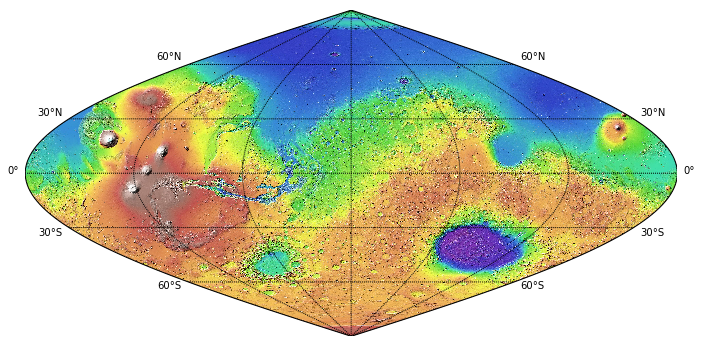

In [60]:
# Show Sinusoidal projection for Mars
plt.figure(figsize=(12,6))

# Well Known Text (WKT) projection string:
MarsSinusoidal = 'PROJCS[\"Mars2000_Sinusoidal_clon0\",GEOGCS[\"GCS_Mars_2000_Sphere\", \
          DATUM["D_Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU",3396190.0,0.0]], \
          PRIMEM["Reference_Meridian",0.0],UNIT["Degree",0.0174532925199433]], \
          PROJECTION["Sinusoidal"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0], \
          PARAMETER["Central_Meridian",0.0],UNIT["Meter",1.0], AUTHORITY["IAU2009","49914"]]'

map = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,
             resolution='l', projection='sinu', lon_0 = 0.0,
             rsphere=Mars2000)

# For this plot, turn off labels for meridians which all converge at the poles.
map.drawmeridians(meridians, color='k',labels=[False,False,False,False])
map.drawparallels(parallels,color='k',labels=[True,True,True,True])

map.imshow(plt.imread(molaClrShade), origin='upper')

plt.show()

----------------------------------------------------------
# Examples for regional map projections
## 1:5 million Mars Charts ##

To facilitate the production and minimize distortions for regional maps, many planets have been split (or tiled) into quadrangles (quads). For Mars, the 1:5 million Mars Charts (MC quads) splits Mars into 30 quarangles utilizing 3 map projections. For the equatorial region, up to 30 degree latitude, the Mercator map projection is used (as shown above). For the mid-latitudes the Lamber Conformal Conic map projection is used. And the pole, Polar Stereographic is used.

Next we plot the different charts and defined map projects for Mars.

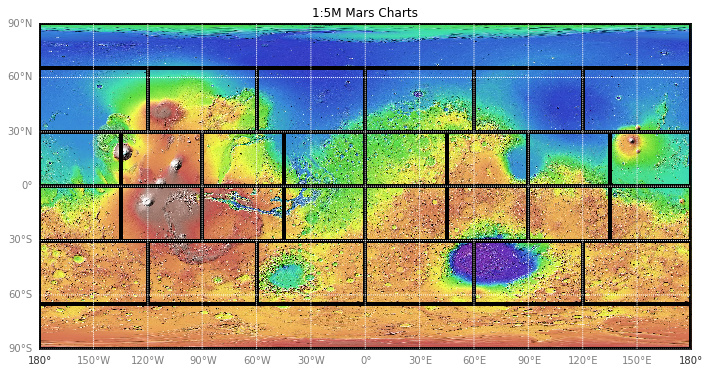

Mars Chart: 01, center Lon,Lat (   0,  73), Name: Mare Boreum
Mars Chart: 02, center Lon,Lat (-147,  45), Name: Diacria
Mars Chart: 03, center Lon,Lat ( -88,  45), Name: Arcadia
Mars Chart: 04, center Lon,Lat ( -29,  45), Name: Mare Acidalium
Mars Chart: 05, center Lon,Lat (  29,  45), Name: Ismenius Lacus
Mars Chart: 06, center Lon,Lat (  88,  45), Name: Casius
Mars Chart: 07, center Lon,Lat ( 147,  45), Name: Cebrenia
Mars Chart: 08, center Lon,Lat (-156,  15), Name: Amazonis
Mars Chart: 09, center Lon,Lat (-112,  15), Name: Tharsis
Mars Chart: 10, center Lon,Lat ( -67,  15), Name: Lunae Palus
Mars Chart: 11, center Lon,Lat ( -22,  15), Name: Oxia Palus
Mars Chart: 12, center Lon,Lat (  22,  15), Name: Arabia
Mars Chart: 13, center Lon,Lat (  67,  15), Name: Syrtis Major
Mars Chart: 14, center Lon,Lat ( 112,  15), Name: Amenthes
Mars Chart: 15, center Lon,Lat ( 156,  15), Name: Elysium
Mars Chart: 16, center Lon,Lat (-156, -15), Name: Memnonia
Mars Chart: 17, center Lon,Lat (-112, -1

In [61]:
plt.figure(figsize=(12,6))

map = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,
             resolution='l', projection='cyl', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

map.readshapefile('cartography_input/mc5m_quadsdd_dense', 'MarsChart5M', drawbounds = True, linewidth=4)

# Define the image
molaClrShade = 'cartography_input/Mars_MGS_MOLA_ClrShade_merge_global_64ppd.jpg'
# Use origin='lower' to flip the image
map.imshow(plt.imread(molaClrShade), origin='upper')

# Use numpy to define 30 degree meridians and parallels and add to the defined map
meridians = np.arange(-180,181,30)
parallels = np.arange(-90,91,30)

map.drawmeridians(meridians, color='w',labels=[True,False,False,True], alpha=0.5)
map.drawparallels(parallels,color='w',labels=[True,False,False,True], alpha=0.5)

plt.title('1:5M Mars Charts')
plt.show()

## Print out quad and center longitude and latitude
for info, shape in zip(map.MarsChart5M_info, map.MarsChart5M):
    label = info['QUADRANGLE']
    name = info['QUAD_NAME']
    lat = info['Y_COORD']
    lon = info['X_COORD']
    print('Mars Chart: {0}, center Lon,Lat ({1:4.0f}, {2:3.0f}), Name: {3}'.format(label.split('-')[1],lon,lat,name))
    #plt.text(lon, lat, label, fontsize=8) 


## Mercator map projection ##
Mercator, as a conformal projection, is good for maintaining the shape of features. Unlike the global projection above, craters will remain round at all latitudes. However, this makes this projection only good for equatorial regions. The Mercator projection is generally only used within the-30 to 30 degree latitude band.

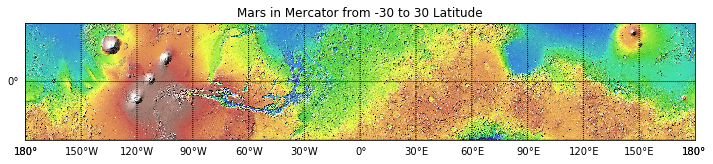

In [62]:
from scipy import misc
plt.figure(figsize=(12,6))

# Well Known Text (WKT) projection string:
MarsMerc = 'PROJCS["Mars2000_Merc_clon0",GEOGCS["GCS_Mars_2000_Sphere", \
          DATUM["D_Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU",3396190.0,0.0]], \
          PRIMEM["Reference_Meridian",0.0],UNIT["Degree",0.0174532925199433]], \
          PROJECTION["Mercator"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0], \
          PARAMETER["Central_Meridian",0.0],PARAMETER["Standard_Parallel_1",0.0],UNIT["Meter",1.0], \
          AUTHORITY["IAU2009","49974"]]'

# For the Mercator projection, distortion grow rapidly past 30 degrees latitude. Thus cat map at 30 lat.
map = Basemap(llcrnrlon=-180,llcrnrlat=-30,urcrnrlon=180,urcrnrlat=30,
             resolution='l', projection='merc', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

meridians = np.arange(-180,181,30)
parallels = np.arange(-30,31,30)

map.drawmeridians(meridians, color='k',labels=[True,False,False,True])
map.drawparallels(parallels,color='k',labels=[True,False,False,True])

# load image using scipy so we can crop it at 30 degrees
myarray = misc.imread(molaClrShade,mode='RGB')

# This is an odd method to crop image our image to 30 degrees latitude. Ideally one should map project
# the original image using a tool like gdalwarp.
image_crop =  myarray[960:1920]

map.imshow(image_crop, origin='upper')
plt.title('Mars in Mercator from -30 to 30 Latitude')
plt.show()

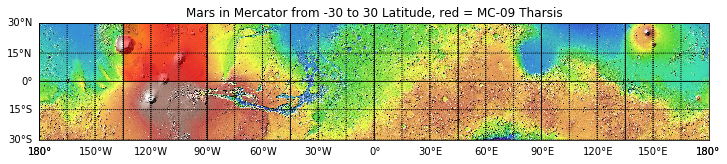

In [63]:
# Next we will plot MC-09, Tharsis, in Mercator using the Mars Chart shapefile from above
from scipy import misc
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

fig = plt.figure(figsize=(12,6))
ax  = fig.add_subplot(111)

map = Basemap(llcrnrlon=-180,llcrnrlat=-30.1,urcrnrlon=180,urcrnrlat=30.1,
             resolution='l', projection='merc', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

map.readshapefile('cartography_input/mc5m_quadsdd_dense', 'MarsChart5M', drawbounds = True)

patches = []
for info, shape in zip(map.MarsChart5M_info, map.MarsChart5M):
    if info['QUADRANGLE'] == 'MC-09':
        patches.append( Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor= 'r', edgecolor='k', linewidths=1., alpha=0.5, zorder=2))

meridians = np.arange(-180,181,15)
parallels = np.arange(-90,91,15)

map.drawmeridians(meridians, color='k',labels=[False,False,False,False])
map.drawparallels(parallels,color='k',labels=[True,False,False,True])

meridians = np.arange(-180,181,30)
map.drawmeridians(meridians,color='k', labels=[True,False,False,True])

# load image using scipy so we can crop it at 30 degrees
myarray = misc.imread(molaClrShade,mode='RGB')

# This is an odd method to crop image our image to 30 degrees latitude. Ideally one should map project
# the original image using a tool like gdalwarp.
image_crop =  myarray[960:1920]

map.imshow(image_crop, origin='upper')
plt.title('Mars in Mercator from -30 to 30 Latitude, red = MC-09 Tharsis')
plt.show()

## Mars Chart 09 (MC-09) in Mercator projection ##

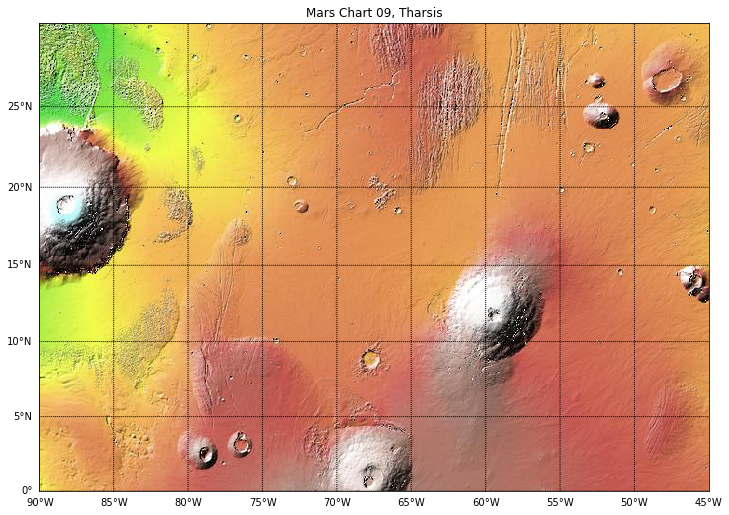

In [64]:
#'XMIN':-90.0, 'YMIN': 0.0, 'XMAX': -45.0, 'YMAX': 30.0
plt.figure(figsize=(12,9))

map = Basemap(llcrnrlon=-90,llcrnrlat=-0.0,urcrnrlon=-45.0,urcrnrlat=30.0,
             resolution='l', projection='merc', lat_0 = 0.0, lon_0 = 0.0,
             rsphere=Mars2000)

meridians = np.arange(-180,181,5)
parallels = np.arange(-90,91,5)

map.drawmeridians(meridians, color='k',labels=[True,False,False,True])
map.drawparallels(parallels,color='k',labels=[True,False,False,True])

#an odd method to crop image for this projection but it is correctly matched
image_crop =  myarray[960:1440,720:1440]

map.imshow(image_crop, origin='upper')
plt.title('Mars Chart 09, Tharsis')
plt.show()